In [10]:
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import pandas as pd
import re
import os
from pathlib import Path

import math

In [11]:
#generates an array of strings, were each element is a line of the file
def generateArray(file):
    with open(file, "r") as f:
        arr = f.read().splitlines()
    return arr

def fileToDictionary(arr):
    
    #arr = file.read().splitlines()
    labels = []
    for x in range(len(arr)):
        if (re.search(".*_big_img_.*", arr[x]) != None):
            i = x
            i += 2
            anot = []
            while(i < len(arr) and re.search(".*_big_img_.*", arr[i]) == None):
                anot.append(arr[i])
                i+= 1
            labels.append({'name': "{}.jpg".format(arr[x]), 'annotations': anot})
    return labels

In [12]:
def showRectInImage(img, x , y, w, h):
    fig,ax = plt.subplots(1)

    #plt.imshow(dictionaries[0]['img'])

    ax.imshow(img)

    rect = patches.Rectangle([x,y],w,h, linewidth=1,edgecolor='r',facecolor='none')

    ax.add_patch(rect)
    plt.show()

In [13]:
def showRectanglesInImage(img, rects):
    fig,ax = plt.subplots(1)
    ax.imshow(img)
             
    for rect in rects:
        #print("Rectangle: x,y,w,h: ",rect[0],rect[1], rect[2], rect[3])
        rectangle = patches.Rectangle([rect[0],rect[1]], rect[2], rect[3], linewidth=1,edgecolor='r',facecolor='none')
        ax.add_patch(rectangle)
        
    plt.show()

In [14]:
def transformCordinates(string, w, h):
    _mult = 1.15
    [MayorAx_s, MinorAx_s, theta_s, x_s, y_s, validation_s] = string.split()
    [MayorAx, MinorAx, theta, x, y, validation] = [float(MayorAx_s), float(MinorAx_s), float(theta_s), float(x_s), float(y_s), int(validation_s)]
    
    if(theta < 0):
        theta = math.pi - theta -(math.pi / 2)
        
    if(theta > math.pi / 2):
        theta = theta -(math.pi / 2)
    
    MayorAx_X = MayorAx * 2 * math.cos(theta) * _mult
    MayorAx_Y = MayorAx * 2 * math.sin(theta) * _mult
    MinorAx_X = MinorAx * 2 * math.sin(theta) * _mult
    MinorAx_Y = MinorAx * 2 * math.cos(theta) * _mult
    
    rect_w = max(MayorAx_X, MinorAx_X)
    rect_h = max(MayorAx_Y, MinorAx_Y)
    rect_x = x - rect_w / 2
    rect_y = y - rect_h / 2
    
    #restrict to bounds
    def recalc( _x , _y):
        if(_x < 0): 
            _x = 0
        elif(_x > w): 
            _x = w -1

        if(_y < 0): 
            _y = 0
        elif(_y > h): 
            _y = h-1
            
        return [ _x , _y ]
    
    TL = [rect_x, rect_y]
    TR = [rect_x + rect_w, rect_y]
    BL = [rect_x, rect_y + rect_h]
    BR = [rect_x + rect_w, rect_y + rect_h]
    
    TL = recalc(TL[0], TL[1])
    TR = recalc(TR[0], TR[1])
    BL = recalc(BL[0], BL[1])
    BR = recalc(BR[0], BR[1])
    
    return [TL[0], TL[1], TR[0] - TL[0], BR[1] - TR[1]]
    #return [rect_x, rect_y, rect_w, rect_h]

In [15]:
def fileToDictionary(arr):
    
    #arr = file.read().splitlines()
    labels = []
    for x in range(len(arr)):
        if (re.search(".*_big_img_.*", arr[x]) != None):
            i = x
            faces = arr[i+1]
            i += 2
            anot = []
            
            while(i < len(arr) and re.search(".*_big_img_.*", arr[i]) == None):
                anot.append(arr[i])
                i+= 1
            try:
                val = "{}.jpg".format(arr[x])

                #matplotlib
                if (os.path.isfile(os.path.join("dataset\dirty_dataset\dataset",val))):
                    img = plt.imread(os.path.join("dataset\dirty_dataset\dataset",val))
                    (img_h, img_w, _) = img.shape

                    rects = []
                    for e in anot:
                        rects.append(transformCordinates(e, img_w, img_h))

                    #labels.append({'name': val, "img": img, "w": img_w, "h":img_h, 'annotations': anot, 'rects': rects})
                    labels.append({'name': val, "img": img, 'size': {"width": img_w, "height":img_h} ,'faces': faces, 'rects': rects})
            except:
                print("{} Not Found".format(val))
                i += 1
                
    return labels

In [33]:
images_urls = glob.glob('.\dataset\dirty_dataset\dataset\*.jpg')
folder = pd.Series(images_urls)

labels_urls = glob.glob('.\dataset\dirty_dataset\labels\FDDB-fold-[0-9][0-9]-ellipseList.txt')
labels_urls

filesArr = [None] * len(labels_urls)
for x in range(len(labels_urls)):
    filesArr[x] = generateArray(labels_urls[x])

dictArr = []
for x in range(len(filesArr)):
    dictArr.append(fileToDictionary(filesArr[x]))
    
dictionaries = []
for e in dictArr:
    #print(e)
    dictionaries = dictionaries + e

#FrameOfLabels = pd.DataFrame(dictionaries)
#FrameOfLabels

2002_07_22_big_img_725.jpg Not Found
2002_08_17_big_img_434.jpg Not Found
2002_08_21_big_img_265.jpg Not Found
2002_08_14_big_img_726.jpg Not Found
2002_08_02_big_img_198.jpg Not Found
2003_01_01_big_img_176.jpg Not Found
2002_08_26_big_img_313.jpg Not Found
2002_08_06_big_img_2288.jpg Not Found
2002_08_19_big_img_588.jpg Not Found
2002_08_24_big_img_398.jpg Not Found
2002_08_09_big_img_525.jpg Not Found
2002_08_19_big_img_373.jpg Not Found
2002_07_31_big_img_249.jpg Not Found
2002_08_25_big_img_150.jpg Not Found
2002_07_20_big_img_318.jpg Not Found
2002_08_12_big_img_594.jpg Not Found
2003_01_13_big_img_728.jpg Not Found
2002_08_19_big_img_325.jpg Not Found


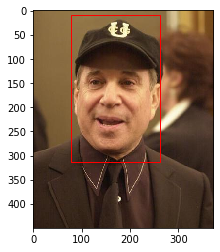

[[76.81154477080062,
  9.233101297738386,
  184.24780245839875,
  303.83513740452327]]

In [39]:
#[x, y, w, h] = transformCordinates('123.583300 85.549500 1.265839 269.693400 161.781200  1', 450,431)
#showRectInImage(dictionaries[0]['img'],x,y,w,h)
#print(dictionaries[0]['rects'])
img = 100
showRectanglesInImage(dictionaries[img]['img'], dictionaries[img]['rects'])
dictionaries[img]['rects']

In [35]:
def pdToXml(name, rectangles, size, img_folder):
    
    name = name[:-4]
        
    xml = ['<annotation>']
    xml.append("    <folder>{}</folder>".format(img_folder))
    xml.append("    <filename>{}</filename>".format(name))
    xml.append("    <source>")
    xml.append("        <database>Unknown</database>")
    xml.append("    </source>")
    xml.append("    <size>")
    xml.append("        <width>{}</width>".format(size["width"]))
    xml.append("        <height>{}</height>".format(size["height"]))
    xml.append("        <depth>3</depth>".format())
    xml.append("    </size>")
    xml.append("    <segmented>0</segmented>")

    for rect in rectangles:
        xmin, ymin = max(0,rect[0]), max(0,rect[1])
        xmax = min(size["width"], rect[0]+rect[2])
        ymax = min(size["height"], rect[1]+rect[3])

        xml.append("    <object>")
        xml.append("        <name>Face</name>")
        xml.append("        <pose>Unspecified</pose>")
        xml.append("        <truncated>0</truncated>")
        xml.append("        <difficult>0</difficult>")
        xml.append("        <bndbox>")
        xml.append("            <xmin>{}</xmin>".format(int(xmin)))
        xml.append("            <ymin>{}</ymin>".format(int(ymin)))
        xml.append("            <xmax>{}</xmax>".format(int(xmax)))
        xml.append("            <ymax>{}</ymax>".format(int(ymax)))
        xml.append("        </bndbox>")
        xml.append("    </object>")
    xml.append('</annotation>')
    return '\n'.join(xml)

In [38]:

#print(pdToXml(dictionaries[img]['name'], dictionaries[img]['rects'], dictionaries[img]['size'], '.\dataset\dirty_dataset\dataset'))

for dictio in dictionaries:
    dictio['XML'] = pdToXml(dictio['name'], dictio['rects'], dictio['size'], '.\dataset\dirty_dataset\dataset')
FrameOfLabels = pd.DataFrame(dictionaries)
FrameOfLabels

,name,img,size,faces,rects,XML
0,2002_08_11_big_img_591.jpg,"[[[147, 117, 81], [148, 118, 82], [148, 120, 8...","{'width': 450, 'height': 431}",1,"[[175.85084002399785, 26.217891713192188, 187....",<annotation>\n <folder>.\dataset\dirty_data...
1,2002_08_26_big_img_265.jpg,"[[[20, 11, 2], [20, 11, 2], [20, 11, 2], [19, ...","{'width': 449, 'height': 305}",3,"[[54.289571462661144, 10.08541131668153, 101.9...",<annotation>\n <folder>.\dataset\dirty_data...
2,2002_07_19_big_img_423.jpg,"[[[127, 126, 121], [126, 125, 120], [124, 123,...","{'width': 449, 'height': 450}",1,"[[187.11045076103198, 33.644657388559494, 136....",<annotation>\n <folder>.\dataset\dirty_data...
3,2002_08_24_big_img_490.jpg,"[[[28, 102, 163], [29, 103, 164], [29, 103, 16...","{'width': 370, 'height': 450}",1,"[[106.04476039425646, 16.288440372046573, 79.2...",<annotation>\n <folder>.\dataset\dirty_data...
4,2002_08_31_big_img_17676.jpg,"[[[150, 126, 114], [153, 129, 117], [156, 132,...","{'width': 364, 'height': 450}",2,"[[0, 0, 61.488199629081244, 79.9257370965013],...",<annotation>\n <folder>.\dataset\dirty_data...
...,...,...,...,...,...,...
2822,2002_08_05_big_img_3704.jpg,"[[[173, 153, 128], [172, 152, 127], [161, 143,...","{'width': 450, 'height': 297}",2,"[[92.68438692594438, 8.582259353573448, 106.24...",<annotation>\n <folder>.\dataset\dirty_data...
2823,2002_08_07_big_img_1358.jpg,"[[[199, 199, 199], [199, 199, 199], [199, 199,...","{'width': 365, 'height': 450}",1,"[[72.06882280594156, 4.873156925312799, 186.30...",<annotation>\n <folder>.\dataset\dirty_data...
2824,2002_07_22_big_img_306.jpg,"[[[52, 53, 35], [55, 56, 38], [59, 60, 42], [6...","{'width': 334, 'height': 449}",1,"[[113.67251877981082, 21.922924910081974, 97.8...",<annotation>\n <folder>.\dataset\dirty_data...
2825,2002_08_13_big_img_619.jpg,"[[[195, 184, 58], [189, 178, 52], [178, 168, 4...","{'width': 449, 'height': 341}",3,"[[96.2081703401803, 93.41875983826033, 82.5528...",<annotation>\n <folder>.\dataset\dirty_data...
